# User Flair Analysis

(no longer valid due to lack of data)

## Method

### Flair data
1. DONE - Q: Does r/asianamerican have flair templates? A: No, it is only customizable.
2. Decipher which ethnicity (Chinese, Japanese, Korean, Vietnamese, other) using flair text
- How should we deal with multi-ethnic flairs (Chinese-Thai, Korean/Black, etc)
- Looks like most of the comments with flair text are from a small subset of users with flairs who have commented numerous times
3. DONE - Flairs can contain up to 10 emojis, so can we use emojis to decipher ethnicity? A: Don't think we need emoji data, doesn't seem to be used very much.

#### Flair data EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
comments_df = pd.read_csv('../data/top_100_post_comments_user_flair.txt', header=None, names=['username', 'flair_text', 'body'])

In [6]:
print(comments_df.shape)
comments_df.head(10)

(3623, 3)


,username,flair_text,body
0,Tungsten_,NaN,Thanks to everyone who engaged in insightful a...
1,ProudBlackMatt,Chinese-American,I would prefer using a process that takes into...
2,TomatoCanned,NaN,"u/Tungsten_, Thanks for creating a section jus..."
3,bad-fengshui,NaN,As with anything related to Asians in politics...
4,Pancake_muncher,NaN,Yet colleges will allow alumni and doners in e...
5,suberry,NaN,I just hated Affirmative Action as a distracti...
6,Puzzled-Painter3301,NaN,My own feeling is that I was never in love wit...
7,e9967780,NaN,Anti Asian racism whether against East Asians ...
8,NaN,NaN,Can we overturn legacy and athlete admissions ...
9,OkartoIceCream,NaN,"I want to remind people that in California, on..."


1. How many comments have flair text? A: Of 3623 rows, 3085 do NOT have flairs, 538 do have flairs
- Seems like we could use more data... but I'm not sure if there is more to collect
2. How many comments are by Chinese/Chinese-Americans flaired users?

In [7]:
print(comments_df.isnull().sum())

username       833
flair_text    3085
body             0
dtype: int64


In [3]:
# use find() to search the array of flair texts -- make the flair texts lowercase first
# substrings to find:
# Chinese: 'china', 'chines', 'abc'
# Korean: 'korea', 'kor', 'abk', 'gyopo'
# Japanese: 'jap', 'abj'
# Filipino: 'filip', "philppi", 'pinoy', 'abf', 'abp'
# Indian: 'indian', 'abi'
# South Asian: 'desi', 'south asia'

# Series of flair_text
flair_text = comments_df['flair_text']

# get rid of nan
flair_text_nona = flair_text.fillna(0)
flair_text_clean = flair_text_nona.str.lower()

#### Chinese flairs

In [4]:
# empty matrix to hold indices of substring
chine_matrix = np.empty((flair_text_clean.shape[0],3))

# each column is for a different type of identifying substring
chine_matrix[:,0] = flair_text_clean.str.find('china')
chine_matrix[:,1] = flair_text_clean.str.find('chines')
chine_matrix[:,2] = flair_text_clean.str.find('abc')

In [5]:
print(chine_matrix)
# row of nan is comment w/o flair

[[nan nan nan]
 [-1.  0. -1.]
 [nan nan nan]
 ...
 [-1. -1. -1.]
 [nan nan nan]
 [-1. -1. -1.]]


In [6]:
# change nan to -1 (no substring found)
chine_matrix_clean = np.nan_to_num(chine_matrix, nan=-1)
print(chine_matrix_clean)

[[-1. -1. -1.]
 [-1.  0. -1.]
 [-1. -1. -1.]
 ...
 [-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]]


In [8]:
# identify rows with one of the keywords (has value other than -1)
print(chine_matrix_clean != -1)
chine_rows = (chine_matrix_clean != -1).any(axis=1)

[[False False False]
 [False  True False]
 [False False False]
 ...
 [False False False]
 [False False False]
 [False False False]]


In [9]:
print(chine_rows.shape)
print(chine_rows.sum()) #97 comments of 3623 have Chinese flair


(3623,)
97


In [11]:
chi_comments_df = comments_df[chine_rows]
num_unique_users = len(pd.unique(chi_comments_df['username']))

print(f'Num of unique users with Chinese flair: {num_unique_users}')

Num of unique users with Chinese flair: 16


Chinese flair summary:
- 97 comments with Chinese flair
- 16 unique users with Chinese flair

#### Korean flairs

- Korean substrings: 'kor', 'abk', 'gyopo', 'hanguk'


In [12]:
# empty matrix to hold korean substring indices
kor_matrix = np.empty((flair_text_clean.shape[0],4))

kor_matrix[:,0] = flair_text_clean.str.find('kor')
kor_matrix[:,1] = flair_text_clean.str.find('abk')
kor_matrix[:,2] = flair_text_clean.str.find('gyopo')
kor_matrix[:,3] = flair_text_clean.str.find('hanguk')

In [13]:
# change nan to -1 (no flair to no substring found)
kor_matrix_clean = np.nan_to_num(kor_matrix, nan=-1)
print(kor_matrix_clean)

[[-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 ...
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]]


In [14]:
# identify rows with one of the keywords (has value other than -1)
print(kor_matrix_clean != -1)
kor_rows = (kor_matrix_clean != -1).any(axis=1)
print(kor_rows)

[[False False False False]
 [False False False False]
 [False False False False]
 ...
 [False False False False]
 [False False False False]
 [False False False False]]
[False False False ... False False False]


In [15]:
print(kor_rows.shape)
print(kor_rows.sum()) # 12 comments of 3623 have Korean flair

# get indexes of Korean flair comments
#kor_idx = np.where(kor_rows==1)[0]
kor_comments_df = comments_df[kor_rows]

(3623,)
12


In [17]:
kor_comments_df = comments_df[kor_rows]
num_unique_kor_users = len(pd.unique(kor_comments_df['username']))
print(f'Num of unique users with Korean flair: {num_unique_kor_users}')

Num of unique users with Korean flair: 3


Korean flairs summary:
- 12 comments with Korean flair
- 3 unique users with Korean flair

# Topic Modeling

In [35]:
import pandas as pd
import numpy as np

# cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import nltk # for co-locations
import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

### 1. Get data

In [106]:
comments_df = pd.read_csv('../data/comments_df.csv')

Note: normalized_tokens column is string type, not list

In [107]:
normalized_tokens = comments_df['normalized_tokens'][0]
print(type(normalized_tokens))

<class 'str'>


In [108]:
from ast import literal_eval

def converter(x):
    return literal_eval(x)

comments_df = pd.read_csv('../data/comments_df.csv', converters={'tokens_new':converter, 'normalized_tokens':converter})

In [109]:
normalized_tokens = comments_df['normalized_tokens'][0]
tokens_new = comments_df['tokens_new'][0]
print(type(normalized_tokens))
print(type(tokens_new))

<class 'list'>
<class 'list'>


Token columns are now lists.

In [110]:
comments_df.head(10)

,Unnamed: 0,username,flair_text,body,tokens_new,normalized_tokens,normalized_tokens_count,word_count
0,0,Tungsten_,NaN,Thanks to everyone who engaged in insightful a...,"[Thanks, to, everyone, who, engaged, in, insig...","[thank, engage, insightful, respectful, discou...",9,20
1,1,ProudBlackMatt,Chinese-American,I would prefer using a process that takes into...,"[I, would, prefer, using, a, process, that, ta...","[prefer, process, take, account, poverty, inst...",52,103
2,2,TomatoCanned,NaN,"u/Tungsten_, Thanks for creating a section jus...","[u/Tungsten_,, Thanks, for, creating, a, secti...","[u/tungsten_,, thank, create, section, discuss...",126,269
3,3,bad-fengshui,NaN,As with anything related to Asians in politics...,"[As, with, anything, related, to, Asians, in, ...","[relate, asians, politic, m, see, lot, non, as...",25,59
4,4,Pancake_muncher,NaN,Yet colleges will allow alumni and doners in e...,"[Yet, colleges, will, allow, alumni, and, done...","[college, allow, alumnus, doner, easily, consi...",19,40
5,5,suberry,NaN,I just hated Affirmative Action as a distracti...,"[I, just, hated, Affirmative, Action, as, a, d...","[hate, affirmative, action, distraction, banda...",78,171
6,6,Puzzled-Painter3301,NaN,My own feeling is that I was never in love wit...,"[My, own, feeling, is, that, I, was, never, in...","[feeling, love, affirmative, action, possible,...",102,231
7,7,e9967780,NaN,Anti Asian racism whether against East Asians ...,"[Anti, Asian, racism, whether, against, East, ...","[anti, asian, racism, east, asians, south, asi...",21,46
8,8,NaN,NaN,Can we overturn legacy and athlete admissions ...,"[Can, we, overturn, legacy, and, athlete, admi...","[overturn, legacy, athlete, admission, point, ...",15,29
9,9,OkartoIceCream,NaN,"I want to remind people that in California, on...","[I, want, to, remind, people, that, in, Califo...","[want, remind, people, california, progressive...",104,200


Text has already been tokenized, lemmatized, normalized.

### 1.1 Collocations

In [41]:
comments_df.tail(5)

,Unnamed: 0,username,flair_text,body,tokens_new,normalized_tokens,normalized_tokens_count,word_count
3312,3618,aduogetsatastegouda,NaN,But that's irrelevant. The right not to be dis...,"[But, that, 's, irrelevant, The, right, not, t...","[irrelevant, right, discriminate, base, race, ...",38,84
3313,3619,rentonwong,Support Asian-American Media!,"Despite my dislike of AA, at least 2/3rds of A...","[Despite, my, dislike, of, AA, at, least, 2/3r...","[despite, dislike, aa, 2/3rds, asian, american...",19,32
3314,3620,rentonwong,Support Asian-American Media!,> If 1/3 of a racial minority's members say th...,"[>, If, 1/3, of, a, racial, minority, 's, memb...","[>, racial, minority, member, want, discrimina...",27,61
3315,3621,NaN,NaN,I'm just annoyed at how there's so much handwa...,"[I, 'm, just, annoyed, at, how, there, 's, so,...","[m, annoyed, handwaving, consequence, pro, aa,...",48,117
3316,3622,rentonwong,Support Asian-American Media!,The current system as it stands preserves whil...,"[The, current, system, as, it, stands, preserv...","[current, system, stand, preserve, privilege, ...",49,102


In [42]:
bigrams = nltk.collocations.BigramCollocationFinder.from_words(comments_df['normalized_tokens'].sum())
print(f'There are {bigrams.N} bigrams in the finder.')

There are 130649 bigrams in the finder.


Note: Why are there so many bigrams? 130955 of them?

In [43]:
def bigramScoring(count, wordsTuple, total):
    return count
bigrams.nbest(bigramScoring, 50)

[('affirmative', 'action'),
 ('asian', 'americans'),
 ('asian', 'american'),
 ('white', 'people'),
 ('high', 'school'),
 ('college', 'admission'),
 ('race', 'base'),
 ('asian', 'student'),
 ('legacy', 'admission'),
 ('test', 'score'),
 ('ivy', 'league'),
 ('white', 'student'),
 ('high', 'education'),
 ('black', 'hispanic'),
 ('support', 'affirmative'),
 ('black', 'people'),
 ('student', 'body'),
 ('asian', 'applicant'),
 ('model', 'minority'),
 ('black', 'latino'),
 ('chinese', 'americans'),
 ('middle', 'class'),
 ('supreme', 'court'),
 ('black', 'student'),
 ('asian', 'kid'),
 ('sit', 'score'),
 ('feel', 'like'),
 ('african', 'american'),
 ('admission', 'officer'),
 ('east', 'asians'),
 ('m', 'sure'),
 ('admission', 'process'),
 ('asian', 'people'),
 ('minority', 'group'),
 ('holistic', 'admission'),
 ('white', 'supremacy'),
 ('african', 'americans'),
 ('base', 'affirmative'),
 ('personality', 'score'),
 ('american', 'student'),
 ('elite', 'school'),
 ('low', 'income'),
 ('united', 's

In [44]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
whBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

NameError: name 'whBigrams' is not defined

***Come back to collocations and n-grams after finding out what role it would play:***
- Would some of the statistically significant n-grams be terms in the td-idf matrix?

### 2. CountVectorizer

First, before vectorizing, convert normalized_tokens column from list to string type

In [111]:
comments_df['normalized_tokens_str'] = comments_df['normalized_tokens'].apply(lambda x: ' '.join(item for item in x))

In [112]:
print(comments_df['normalized_tokens_str'][0])
comments_df.head(5)

thank engage insightful respectful discourse news thread lock comment


,Unnamed: 0,username,flair_text,body,tokens_new,normalized_tokens,normalized_tokens_count,word_count,normalized_tokens_str
0,0,Tungsten_,NaN,Thanks to everyone who engaged in insightful a...,"[Thanks, to, everyone, who, engaged, in, insig...","[thank, engage, insightful, respectful, discou...",9,20,thank engage insightful respectful discourse n...
1,1,ProudBlackMatt,Chinese-American,I would prefer using a process that takes into...,"[I, would, prefer, using, a, process, that, ta...","[prefer, process, take, account, poverty, inst...",52,103,prefer process take account poverty instead ge...
2,2,TomatoCanned,NaN,"u/Tungsten_, Thanks for creating a section jus...","[u/Tungsten_,, Thanks, for, creating, a, secti...","[u/tungsten_,, thank, create, section, discuss...",126,269,"u/tungsten_, thank create section discuss read..."
3,3,bad-fengshui,NaN,As with anything related to Asians in politics...,"[As, with, anything, related, to, Asians, in, ...","[relate, asians, politic, m, see, lot, non, as...",25,59,relate asians politic m see lot non asian peop...
4,4,Pancake_muncher,NaN,Yet colleges will allow alumni and doners in e...,"[Yet, colleges, will, allow, alumni, and, done...","[college, allow, alumnus, doner, easily, consi...",19,40,college allow alumnus doner easily consider me...


In [113]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer()
count_vector = count_vectorizer.fit_transform(comments_df['normalized_tokens_str'])

In [114]:
print(count_vector.shape)

(3283, 10416)


- 3283 rows, 10416 columns/unique tokens

### 3. TD-IDF Vectorizer

In [115]:
tdidf_transformer = sklearn.feature_extraction.text.TfidfTransformer()
tdidf_vector = tdidf_transformer.fit_transform(count_vector)

In [116]:
list(zip(count_vectorizer.vocabulary_.keys(), tdidf_vector.data))[:20]

[('thank', 0.2780200460567064),
 ('engage', 0.26195927494969323),
 ('insightful', 0.43215032574037665),
 ('respectful', 0.2575158754452915),
 ('discourse', 0.3727913011076437),
 ('news', 0.416606600805565),
 ('thread', 0.3353399263238714),
 ('lock', 0.35292279562425094),
 ('comment', 0.22687459584571354),
 ('prefer', 0.08876180082890424),
 ('process', 0.16869934059802721),
 ('take', 0.10273522940576957),
 ('account', 0.09721605705964464),
 ('poverty', 0.12282557059523336),
 ('instead', 0.11604808805308388),
 ('generation', 0.11604808805308388),
 ('family', 0.10873273422159661),
 ('come', 0.1451705776706874),
 ('america', 0.1381517221258386),
 ('painfully', 0.11937042691013038)]

### 4. Prune Matrix of features

In [117]:
#initialize
prune_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(min_df=3, max_features=1000, stop_words='english', norm='l2') # why norm=l2?
#train
pruned_vec = prune_vectorizer.fit_transform(comments_df['normalized_tokens_str'])

- min document freq=3 because low document frequency inflates td-idf
- An idea: visualize document freq of each word

In [118]:
pruned_vec

<3283x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 72475 stored elements in Compressed Sparse Row format>

Now, matrix is only 1000 terms/columns

In [119]:
# try to find term in matrix
termtofind = 'remove'
try:
    print(prune_vectorizer.vocabulary_[termtofind])
except KeyError:
    print(f'"{termtofind}" is missing')
    print('The available words are: {} ...'.format(list(prune_vectorizer.vocabulary_.keys())[:10]))

744


### 5. Flat Clustering with K-means

Silhouette method:

First let's initialize our PCA

In [120]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(pruned_vec.toarray())
reduced_data = pca.transform(pruned_vec.toarray())

Silhouette plot helper function:

In [121]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

    #ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # compute mean silhouette scores/coefficient over all samples
    silh_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute silhouette coefficient for each sample
    sample_silh_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
        # get silh scores for cluster
        ith_cluster_silh_values = sample_silh_values[cluster_labels==i]
        ith_cluster_silh_values.sort()

        cluster_size = ith_cluster_silh_values.shape[0]
        y_upper = y_lower + cluster_size
        cmap = matplotlib.cm.get_cmap('nipy_spectral')
        color = cmap(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper), 0, ith_cluster_silh_values, facecolor=color, 
                          edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * cluster_size, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title('Silhoutte plot for each cluster')
    ax1.set_xlabel('Silhouette score')
    ax1.set_ylabel('Cluster label')

    ax1.axvline(x=silh_avg, color='red', linestyle='--')

    ax1.set_yticks([]) # clear y-axis label and ticks
    #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # label clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1], marker='o', c='white', alpha=1, s=200)
    # write in cluster number in the centers
    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
    
    ax2.set_title('Visual of clustered data')
    ax2.set_xlabel('PC 1')
    ax2.set_ylabel('PC 2')

    plt.suptitle(f'Silhouette analysis for KMeans clustering with n_clusters={n_clusters}', fontsize=14, fontweight='bold')
    plt.show()

    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silh_avg}")

    return cluster_labels

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


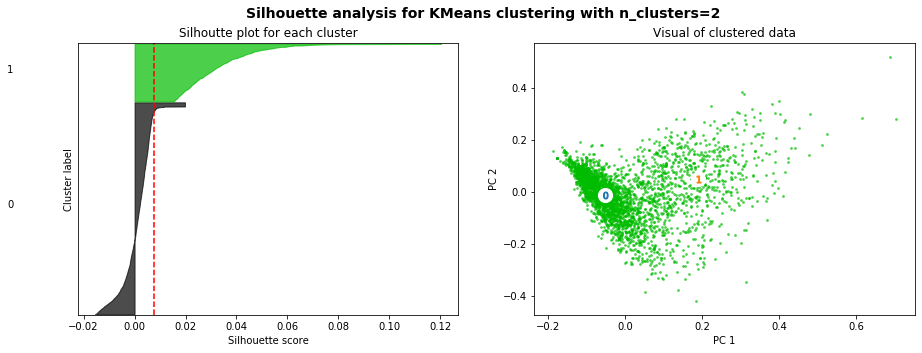

For n_clusters = 2, The average silhouette_score is : 0.007789599172877796


In [122]:
X = pruned_vec.toarray()
two_clusters_labels = plotSilhouette(2, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


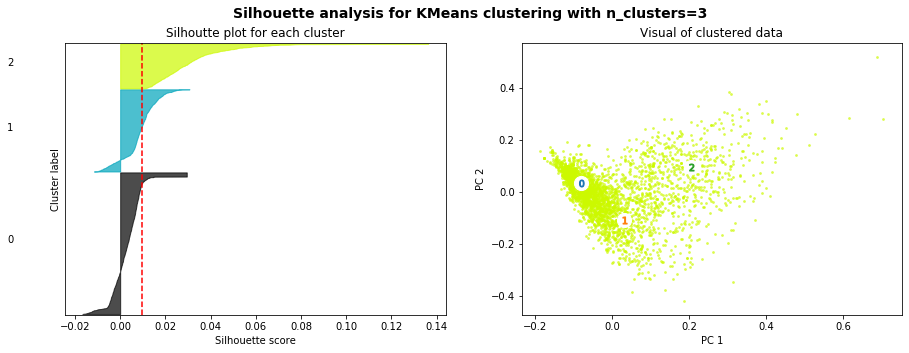

For n_clusters = 3, The average silhouette_score is : 0.009472908533114235


array([0, 1, 2, ..., 0, 1, 1])

In [123]:
X = pruned_vec.toarray()
plotSilhouette(3, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


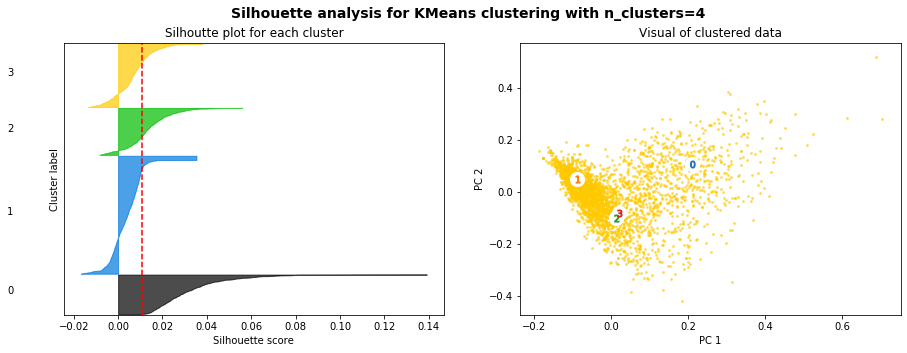

For n_clusters = 4, The average silhouette_score is : 0.010552463928595596


array([1, 3, 0, ..., 1, 3, 3])

In [124]:
X = pruned_vec.toarray()
plotSilhouette(4, X)

Q: Get num of points in each cluster. Need to investigate why some clusters look like there is 1 observation in it.

A: There were undropped rows that had deleted comments (e.g. [deleted], [removed])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


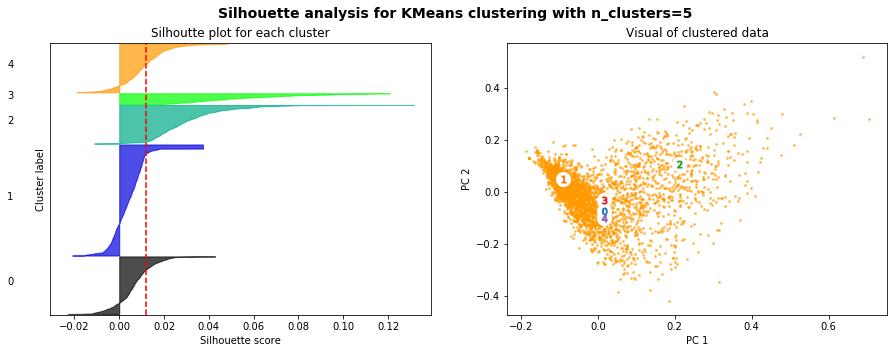

For n_clusters = 5, The average silhouette_score is : 0.011888292354667304


array([1, 0, 2, ..., 0, 0, 0])

In [125]:
X = pruned_vec.toarray()
plotSilhouette(5, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


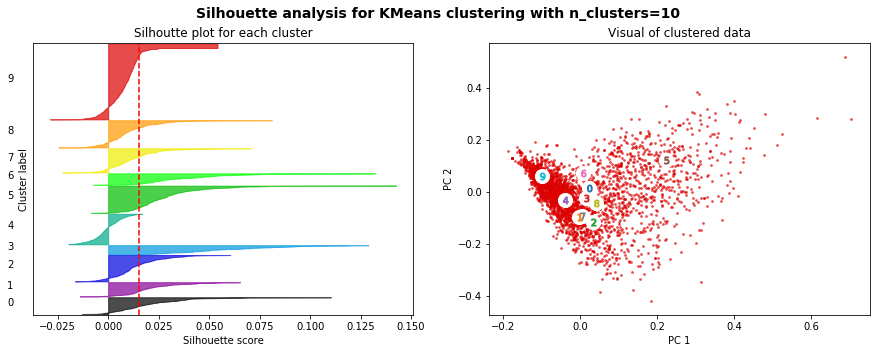

For n_clusters = 10, The average silhouette_score is : 0.015220596572741543


array([9, 4, 5, ..., 8, 4, 8])

In [132]:
X = pruned_vec.toarray()
plotSilhouette(10, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


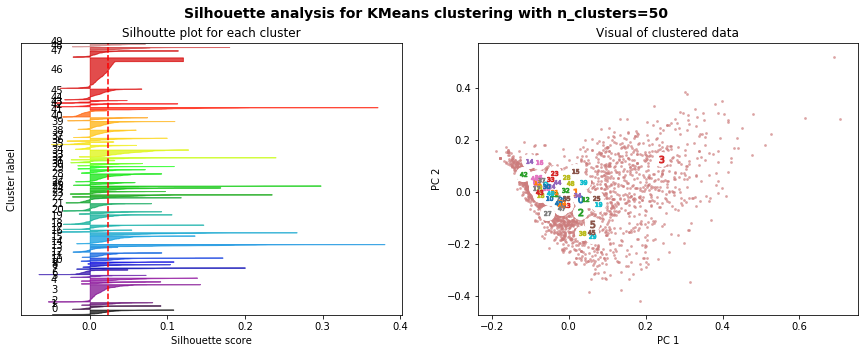

For n_clusters = 50, The average silhouette_score is : 0.02411296829917179


array([14, 28, 21, ..., 11, 22, 19])

In [134]:
X = pruned_vec.toarray()
plotSilhouette(50, X)

***Interpret:*** 
The low average silhouettte scores may indicate that it is difficult to separate samples between clusters -- there may not be distinct clusters of samples.

Look at distinguishing features in each cluster for n=2:

In [126]:
numClusters=2

In [128]:
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')
km.fit(pruned_vec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [129]:
comments_df['kmeans_predictions'] = km.labels_

In [130]:
# investigating how getting distinguishing features in each cluster works

print(km.cluster_centers_)
arg_sorted_asc = km.cluster_centers_.argsort()
print(np.max(arg_sorted_asc[0,:]))
print(np.max(arg_sorted_asc[1,:]))

arg_sorted_desc = arg_sorted_asc[:,::-1]

terms = prune_vectorizer.get_feature_names()
for ind in arg_sorted_desc[0, :15]:
        print(' %s' % terms[ind])

[[0.00071971 0.00112041 0.00123311 ... 0.00760747 0.0004009  0.00213186]
 [0.00345957 0.00345282 0.00221628 ... 0.00827603 0.00069047 0.00099212]]
999
999
 asian
 people
 white
 asians
 aa
 think
 school
 like
 student
 harvard
 race
 admission
 black
 americans
 minority


In [131]:
terms = prune_vectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 asian
 people
 white
 asians
 aa
 think
 school
 like
 student
 harvard
 race
 admission
 black
 americans
 minority


Cluster 1:
 action
 affirmative
 asian
 white
 americans
 people
 admission
 race
 minority
 asians
 college
 support
 student
 think
 like




From above, we can tell that the top terms of each cluster don't really tell us distinguishing features.

In [135]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

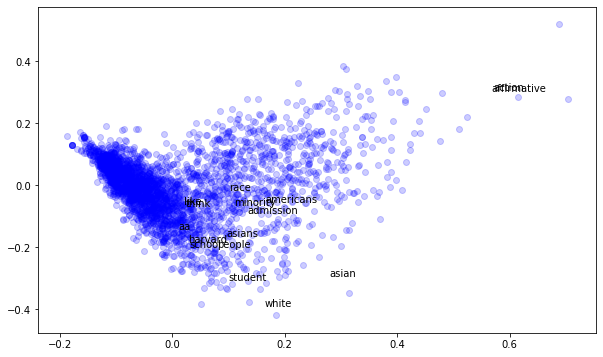

In [136]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = 'blue', alpha = 0.2, label = comments_df['kmeans_predictions'])
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks()
plt.yticks()
plt.show()

In [105]:
# look at points where PC2 is close to 1
pc2_outliers = np.where(reduced_data[:,1]>=0.3)
print(pc2_outliers)

comments_df.iloc[pc2_outliers]

(array([  52,  368,  369,  377,  378,  382,  383,  395,  496,  514,  519,
        680,  682,  718,  783,  794,  869,  871, 1305, 1491, 1595, 1602,
       1604, 1613, 1615, 1716, 1797, 2016, 2078, 2101, 2108, 2109, 2136,
       2211, 2232, 2248, 2411, 2431, 2497, 2677, 2735, 2771, 2791, 2800,
       2801, 2841, 3000, 3030, 3135, 3138, 3213], dtype=int64),)


,Unnamed: 0,username,flair_text,body,tokens_new,normalized_tokens,normalized_tokens_count,word_count,normalized_tokens_str,kmeans_predictions
52,56,LEJ5512,NaN,(posted this in another related thread)\n\nAls...,"[posted, this, in, another, related, thread, A...","[post, related, thread, worth, listen, recent,...",14,29,post related thread worth listen recent throug...,1
368,401,AutoModerator,NaN,Your account is too new and has been autofilte...,"[Your, account, is, too, new, and, has, been, ...","[account, new, autofiltere, build, reputation,...",24,59,account new autofiltere build reputation good ...,0
369,402,AutoModerator,NaN,Your account is too new and has been autofilte...,"[Your, account, is, too, new, and, has, been, ...","[account, new, autofiltere, build, reputation,...",24,59,account new autofiltere build reputation good ...,0
377,410,AutoModerator,NaN,Your account is too new and has been autofilte...,"[Your, account, is, too, new, and, has, been, ...","[account, new, autofiltere, build, reputation,...",24,59,account new autofiltere build reputation good ...,0
378,411,AutoModerator,NaN,Your account is too new and has been autofilte...,"[Your, account, is, too, new, and, has, been, ...","[account, new, autofiltere, build, reputation,...",24,59,account new autofiltere build reputation good ...,0
382,416,AutoModerator,NaN,Your account is too new and has been autofilte...,"[Your, account, is, too, new, and, has, been, ...","[account, new, autofiltere, build, reputation,...",24,59,account new autofiltere build reputation good ...,0
383,417,AutoModerator,NaN,Your account is too new and has been autofilte...,"[Your, account, is, too, new, and, has, been, ...","[account, new, autofiltere, build, reputation,...",24,59,account new autofiltere build reputation good ...,0
395,429,AutoModerator,NaN,Your account is too new and has been autofilte...,"[Your, account, is, too, new, and, has, been, ...","[account, new, autofiltere, build, reputation,...",24,59,account new autofiltere build reputation good ...,0
496,544,AutoModerator,NaN,Your account is too new and has been autofilte...,"[Your, account, is, too, new, and, has, been, ...","[account, new, autofiltere, build, reputation,...",33,73,account new autofiltere build reputation good ...,0
514,563,AutoModerator,NaN,"Hello, your comment has been removed for inclu...","[Hello, your, comment, has, been, removed, for...","[hello, comment, remove, include, reddit, link...",26,52,hello comment remove include reddit link link ...,0


From above, we can see that the AutoModerator has autofiltered new accounts. Remove rows that have been filtered by the AutoModerator in the preprocessing. (DONE)